# Exploratory Data Analysis of Twitter Data for openstreet NYC

This notebook differs from the previous notebook as it analyzes all tweets obtained in 2021 (1 Sep - 31 Dec)

In [8]:
#Importing necessary commands

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS
import PIL.Image
import dataframe_image as dfi

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go

import zipfile
import os


# Plot settings
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['font.size'] = 12
plt.style.use('fivethirtyeight')
sns.set_context("talk")
pos_neg_palette = ['d8f3dc', 'greyish', 'ffafcc']
path = [] #enter your path

# Raw Data Processing

In [9]:
raw = pd.read_csv('openstreet2019jan-dec_data.csv')
raw.head()

banner_image             fullname  \
0           NaN       Mad Men Quotes   
1           NaN  Jean Cocteau Quotes   
2           NaN  Jean Cocteau Quotes   
3           NaN      Freddie Mercury   
4           NaN     Mark A. McDonald   

                                            images/0 images/1 images/2  \
0  https://pbs.twimg.com/media/EMgSe1MXYAEf11c.jp...      NaN      NaN   
1                                                NaN      NaN      NaN   
2                                                NaN      NaN      NaN   
3  https://pbs.twimg.com/media/ELSs2ksW4AAXebk.jp...      NaN      NaN   
4                                                NaN      NaN      NaN   

  images/3 in_reply_to/0 in_reply_to/1 in_reply_to/2 in_reply_to/3  ...  \
0      NaN           NaN           NaN           NaN           NaN  ...   
1      NaN           NaN           NaN           NaN           NaN  ...   
2      NaN           NaN           NaN           NaN           NaN  ...   
3      NaN           NaN           NaN           NaN           NaN  ...   
4      NaN           NaN           NaN           NaN           NaN  ...   

  tweet_mentions/2 tweet_mentions/3 tweet_mentions/4 tweet_mentions/5  \
0              NaN              NaN              NaN              NaN   
1              NaN              NaN              NaN              NaN   
2              NaN              NaN              NaN              NaN   
3              NaN              NaN              NaN              NaN   
4              NaN              NaN              NaN              NaN   

  tweet_mentions/6 tweet_mentions/7 tweet_mentions/8 tweet_mentions/9  \
0              NaN              NaN              NaN              NaN   
1              NaN              NaN              NaN              NaN   
2              NaN              NaN              NaN              NaN   
3              NaN              NaN              NaN              NaN   
4              NaN              NaN              NaN              NaN   

                                                 url          username  
0  https://twitter.com/MadMenQts/status/120923682...        @MadMenQts  
1  https://twitter.com/CocteauQuotes/status/12091...    @CocteauQuotes  
2  https://twitter.com/CocteauQuotes/status/12088...    @CocteauQuotes  
3  https://twitter.com/Farrokh_Mercury/status/120...  @Farrokh_Mercury  
4  https://twitter.com/mmcdonald77/status/1201873...      @mmcdonald77  

[5 rows x 60 columns]

In [10]:
d19 = pd.read_csv('openstreet2019jan-dec_data.csv')
d20 = pd.read_csv('openstreet2020jan-dec_data.csv')
d21_1 = pd.read_csv('openstreet2021jan-sept_data.csv')
d21_2 = pd.read_csv('openstreet2021sep-dec_data.csv')
d22_1 = pd.read_csv('openstreet2022jan-mar_data.csv')
d22_2 = pd.read_csv('openstreet2022mar-dec_data.csv')

file_list = [d19, d20, d21_1, d21_2, d22_1, d22_2]


<Axes: xlabel='date'>

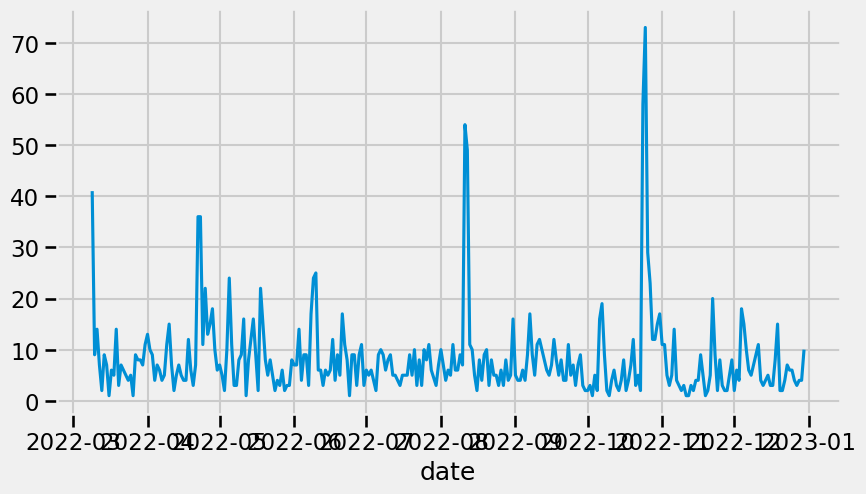

In [11]:
#This box is for exploratory analysis of any year
chosen_df = d22_2

tweets22 = chosen_df.loc[:, ['timestamp', 'username', 'text', 'quotes', 'replies',
       'retweets', 'likes', 'fullname']]
tweets22['timestamp'] = pd.to_datetime(tweets22['timestamp'])
tweets22['date']= tweets22['timestamp'].dt.date

# Timeframe when the tweets appeared the most in the chosen year
datecount = tweets22.groupby('date').size()
datecount.plot()

In [12]:
# Creating a combined dataframe for complete analysis

df = pd.DataFrame()
df = pd.concat(file_list) 
df.head()

banner_image             fullname  \
0           NaN       Mad Men Quotes   
1           NaN  Jean Cocteau Quotes   
2           NaN  Jean Cocteau Quotes   
3           NaN      Freddie Mercury   
4           NaN     Mark A. McDonald   

                                            images/0 images/1 images/2  \
0  https://pbs.twimg.com/media/EMgSe1MXYAEf11c.jp...      NaN      NaN   
1                                                NaN      NaN      NaN   
2                                                NaN      NaN      NaN   
3  https://pbs.twimg.com/media/ELSs2ksW4AAXebk.jp...      NaN      NaN   
4                                                NaN      NaN      NaN   

  images/3 in_reply_to/0 in_reply_to/1 in_reply_to/2 in_reply_to/3  ...  \
0      NaN           NaN           NaN           NaN           NaN  ...   
1      NaN           NaN           NaN           NaN           NaN  ...   
2      NaN           NaN           NaN           NaN           NaN  ...   
3      NaN           NaN           NaN           NaN           NaN  ...   
4      NaN           NaN           NaN           NaN           NaN  ...   

  tweet_mentions/12 tweet_mentions/13 tweet_mentions/14 tweet_mentions/15  \
0               NaN               NaN               NaN               NaN   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

  tweet_mentions/16 in_reply_to/21 Unnamed: 0 tweet_mentions/17  \
0               NaN            NaN        NaN               NaN   
1               NaN            NaN        NaN               NaN   
2               NaN            NaN        NaN               NaN   
3               NaN            NaN        NaN               NaN   
4               NaN            NaN        NaN               NaN   

   tweet_mentions/18  tweet_mentions/19  
0                NaN                NaN  
1                NaN                NaN  
2                NaN                NaN  
3                NaN                NaN  
4                NaN                NaN  

[5 rows x 93 columns]

In [13]:
# Sorting only necessary columns
tweets = df.loc[:, ['timestamp', 'username', 'text', 'quotes', 'replies',
       'retweets', 'likes', 'fullname']]

# Changing timestamp to datetime

tweets['timestamp'] = pd.to_datetime(tweets['timestamp'])
tweets['date']= tweets['timestamp'].dt.date


In [14]:
# Changing timestamp to datetime
tweets = tweets.set_index('timestamp')
tweets.sort_index(inplace=True)
tweets

username  \
timestamp                                     
2019-01-07 09:16:00+00:00    @CocteauQuotes   
2019-01-15 05:16:00+00:00    @CocteauQuotes   
2019-02-10 09:16:00+00:00    @CocteauQuotes   
2019-02-25 21:16:00+00:00    @CocteauQuotes   
2019-03-05 13:03:00+00:00       @Penalosa_G   
...                                     ...   
2022-12-30 18:21:00+00:00     @amyyeewrites   
2022-12-30 20:33:00+00:00         @infopobn   
2022-12-30 21:44:00+00:00          @NYC_SBS   
2022-12-30 21:55:00+00:00  @berrystalliance   
2022-12-30 23:57:00+00:00         @infopobn   

                                                                        text  \
timestamp                                                                      
2019-01-07 09:16:00+00:00  New York is an open city--wide open. Arms, fac...   
2019-01-15 05:16:00+00:00  New York is an open city--wide open. Arms, fac...   
2019-02-10 09:16:00+00:00  New York is an open city--wide open. Arms, fac...   
2019-02-25 21:16:00+00:00  New York is an open city--wide open. Arms, fac...   
2019-03-05 13:03:00+00:00  It's happening,#OpenStreets in many cities as ...   
...                                                                      ...   
2022-12-30 18:21:00+00:00  Our @citylab story: The pandemic transformed s...   
2022-12-30 20:33:00+00:00  Perhaps the NYC govt politicians and lackey en...   
2022-12-30 21:44:00+00:00  We're proud to be a part of @nycgov's full-for...   
2022-12-30 21:55:00+00:00  She wouldn’t last a day in nyc. “im half a mil...   
2022-12-30 23:57:00+00:00  When Lobbyists count for more than the NYC pub...   

                           quotes  replies  retweets  likes  \
timestamp                                                     
2019-01-07 09:16:00+00:00       0        0         0      1   
2019-01-15 05:16:00+00:00       0        0         1      4   
2019-02-10 09:16:00+00:00       0        0         1      2   
2019-02-25 21:16:00+00:00       0        0         0      0   
2019-03-05 13:03:00+00:00       0        0         2      6   
...                           ...      ...       ...    ...   
2022-12-30 18:21:00+00:00       0        1         1      4   
2022-12-30 20:33:00+00:00       2        0         3      6   
2022-12-30 21:44:00+00:00       0        0         0      0   
2022-12-30 21:55:00+00:00       0        1         1      2   
2022-12-30 23:57:00+00:00       1        0         0      1   

                                                            fullname  \
timestamp                                                              
2019-01-07 09:16:00+00:00                        Jean Cocteau Quotes   
2019-01-15 05:16:00+00:00                        Jean Cocteau Quotes   
2019-02-10 09:16:00+00:00                        Jean Cocteau Quotes   
2019-02-25 21:16:00+00:00                        Jean Cocteau Quotes   
2019-03-05 13:03:00+00:00              Gil Penalosa #Cities4Everyone   
...                                                              ...   
2022-12-30 18:21:00+00:00                                    Amy Yee   
2022-12-30 20:33:00+00:00        Preserve Our Brooklyn Neighborhoods   
2022-12-30 21:44:00+00:00  NYC Department of Small Business Services   
2022-12-30 21:55:00+00:00                         Berry St. Alliance   
2022-12-30 23:57:00+00:00        Preserve Our Brooklyn Neighborhoods   

                                 date  
timestamp                              
2019-01-07 09:16:00+00:00  2019-01-07  
2019-01-15 05:16:00+00:00  2019-01-15  
2019-02-10 09:16:00+00:00  2019-02-10  
2019-02-25 21:16:00+00:00  2019-02-25  
2019-03-05 13:03:00+00:00  2019-03-05  
...                               ...  
2022-12-30 18:21:00+00:00  2022-12-30  
2022-12-30 20:33:00+00:00  2022-12-30  
2022-12-30 21:44:00+00:00  2022-12-30  
2022-12-30 21:55:00+00:00  2022-12-30  
2022-12-30 23:57:00+00:00  2022-12-30  

[10960 rows x 8 columns]

<Axes: xlabel='date'>

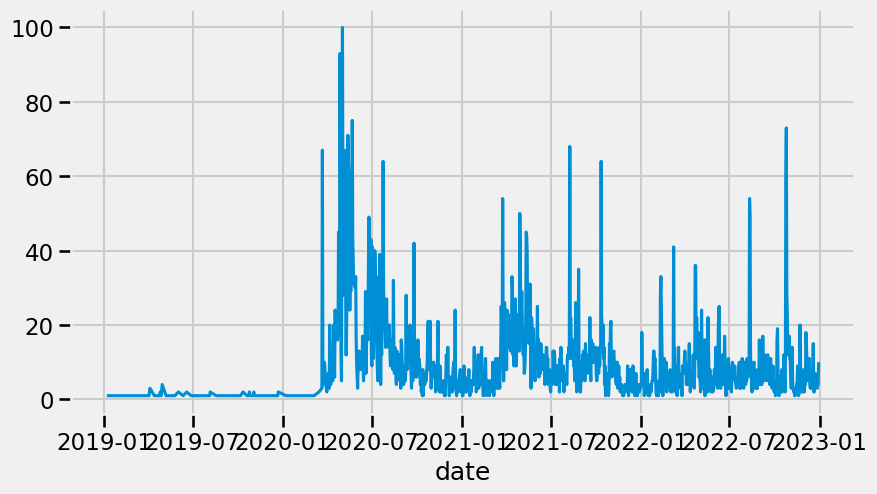

In [15]:
# Timeframe when the tweets appeared the most in 2021
datecount = tweets.groupby('date').size()
datecount.plot()

In [16]:
# Based on the result, we need to take note of 2020-05-02, 2020-04-27, 2020-05-22, 2022-10-25, 2020-05-13. 
# All these have over 70 tweets in one day
datecount.sort_values(ascending=False).head(30)

date
2020-05-02    100
2020-04-27     93
2020-05-22     75
2022-10-25     73
2020-05-13     71
2021-08-09     68
2020-03-22     67
2020-05-06     67
2020-05-14     66
2020-07-24     64
2021-10-12     64
2020-05-20     61
2020-05-07     61
2020-05-15     60
2020-05-08     59
2020-05-01     58
2022-10-24     58
2021-03-25     54
2022-08-11     54
2020-05-16     53
2020-04-28     52
2021-04-29     50
2020-06-25     49
2022-08-12     49
2020-05-03     46
2021-05-12     45
2020-04-24     45
2021-05-13     44
2020-05-23     43
2020-06-29     43
dtype: int64

In [17]:
# Check for duplicate rows (should include or not?)
tweets = tweets[tweets.duplicated(subset='text')!=True]

# Removing usernames that are not posting about open streets.
usernames = '@CocteauQuotes'
tweets_filtered = tweets[tweets['username']!= usernames]


In [18]:
# Saving filtered tweets
# tweets_filtered.to_csv('openstreet_filtered.csv', sep=',', index=True, encoding ='utf-8')

# 
# Start Here For Preprocessing

In [19]:
# Start here when loading in the file:
tweets = pd.read_csv('openstreet_filtered.csv', sep=',', index_col=0, encoding ='utf-8')
tweets.shape

(10286, 8)

In [20]:
tweets['username'].value_counts()

username
@berrystalliance    527
@freeparknyc        296
@NYC_DOT            284
@Streetfilms        229
@JimRockaway        206
                   ... 
@uptownini            1
@xtrahotsauce         1
@SFWDistrict          1
@kwawa_hsuk302        1
@amyyeewrites         1
Name: count, Length: 3136, dtype: int64

Many posts are done by advocate social groups, such as berrystalliance, freeparknyc, fgopenstreets and 34_ave. 

@NYC_DOT and is an authority so there will likely be no opinions. So they will be removed from the study. However, I will not be removing the various coalitions, as they are independent of the government and represents local community participation.

In [21]:
# The new tweets shape should be less than before
govt_usernames = ['@NYC_DOT', '@nycgov', '@News12BX','@ABC7NY', '@nyc311']
tweets = tweets[tweets['username'].isin(govt_usernames)== False]
tweets.shape

(9912, 8)

In [22]:
# Convert all to lower case
tweets['text'] = tweets['text'].str.lower()

In [23]:
# Text preprocessing

# Remove hashtags，@usernames and urls
rhashtag = r'#\S+'
ruser = r'@\S+'
rhttp = r'http\S+'

tweets['text'] = tweets.text.str.replace(rhashtag, '', regex=True)
tweets['text'] = tweets.text.str.replace(ruser, '', regex=True)
tweets['text'] = tweets.text.str.replace(rhttp, '', regex=True)
tweets['text'] = tweets.text.str.replace('\n', ' ', regex=False)



In [24]:
tweets.head()

username  \
timestamp                                   
2019-03-05 13:03:00+00:00     @Penalosa_G   
2019-03-26 01:29:00+00:00          @diceo   
2019-04-02 00:41:00+00:00  @happifydesign   
2019-04-03 14:47:00+00:00   @NellePierson   
2019-04-05 14:24:00+00:00         @Curbed   

                                                                        text  \
timestamp                                                                      
2019-03-05 13:03:00+00:00  it's happening, in many cities as san jose, la...   
2019-03-26 01:29:00+00:00  this is how much space in total that all of ny...   
2019-04-02 00:41:00+00:00  hey,  let's do better than nyc and make our  m...   
2019-04-03 14:47:00+00:00  the city needs to actually pay for open street...   
2019-04-05 14:24:00+00:00  new york city should use its open-streets even...   

                           quotes  replies  retweets  likes  \
timestamp                                                     
2019-03-05 13:03:00+00:00       0        0         2      6   
2019-03-26 01:29:00+00:00       0        1         0      3   
2019-04-02 00:41:00+00:00       0        0         1      3   
2019-04-03 14:47:00+00:00       0        1         0      0   
2019-04-05 14:24:00+00:00       0        1         4     11   

                                                fullname        date  
timestamp                                                             
2019-03-05 13:03:00+00:00  Gil Penalosa #Cities4Everyone  2019-03-05  
2019-03-26 01:29:00+00:00                           Dice  2019-03-26  
2019-04-02 00:41:00+00:00                    😷 happify 😷  2019-04-02  
2019-04-03 14:47:00+00:00                  nelle pierson  2019-04-03  
2019-04-05 14:24:00+00:00                         Curbed  2019-04-05

In [25]:
# Understanding the importance of COVID in data
covid = tweets['text'].str.contains(pat='covid')
print('covid counts:', covid.value_counts())

pandemic = tweets['text'].str.contains(pat='pandemic')
print('pandemic counts:', pandemic.value_counts())

covid counts: text
False    9726
True      186
Name: count, dtype: int64
pandemic counts: text
False    9614
True      298
Name: count, dtype: int64


This showcases that there is a small portion of the tweets that contain information about the pandemic, at about 3% of the total data. Notably, this sample data was taken in 2022, after the peak of the pandemic. Hence, I will re-evaluate the value of taking into account the effect of covid-19 in relations to open streets in this study.

In [26]:
# Obtaining a sample of 100 tweets for analysis
#sample_tweets = tweets.sample(100)
#sample_tweets

In [27]:
# Saving 
#sample_tweets.to_csv('openstreet_sample_tweets.csv', sep=',', index=True, encoding ='utf-8')

In [28]:
# Loading sample_tweets
sample_tweets = pd.read_csv('openstreet_sample_tweets.csv')
cols = ['quotes', 'replies', 'retweets', 'likes', 'fullname']
sample_tweets.drop(columns = cols, inplace = True)

# Remove hashtags，@usernames and urls
rhashtag = r'#\S+'
ruser = r'@\S+'
rhttp = r'http\S+'

# Text preprocessing
sample_tweets['text'] = sample_tweets.text.str.replace(rhashtag, '', regex=True)
sample_tweets['text'] = sample_tweets.text.str.replace(ruser, '', regex=True)
sample_tweets['text'] = sample_tweets.text.str.replace(rhttp, '', regex=True)
sample_tweets['text'] = sample_tweets.text.str.replace('\n', ' ', regex=False)
sample_tweets.head(3)

Unnamed: 0                  timestamp          username  \
0           0  2020-08-10 12:44:00+00:00   @Winchester9Law   
1           1  2022-05-05 00:14:00+00:00  @berrystalliance   
2           2  2021-11-08 20:17:00+00:00          @gecko39   

                                                text        date  Matt  Tiger  \
0  Op-Ed | New York City’s Open Streets plan fail...  10/08/2020  -1.0   -1.0   
1  Same on  Berry wrong sign for wrong program  y...  05/05/2022  -1.0   -1.0   
2  NYC's Streetfighter on NYC's Best Open Street:...  08/11/2021   0.5    0.0   

   Stella  Sarah  Harry  human average  
0    -0.5   -1.0   -1.0           -0.9  
1    -1.0   -1.0   -1.0           -1.0  
2     0.0    0.5    0.5            0.3

# Sentiment Analysis
For sentiment analysis, it is worth noting that the average Twitter sentiment is about -0.2, slightly towards the negative side. It highlights the type of comments/use of words. Hence, a positive sentiment on average from the obtained tweets will be able to point to a positive opinion of open streets on average.

## Experimenting using VADER

This section aims to use the VADER dictionary for sentiment analysis.

Alternatives are TextBlob and Flair, which we will experiment this later. However, it is worth noting that VADER is especially easy to implement and understand the inner mechanics, and would be preferred as an option for urban planners or social data scientists who may not be specialists in the domain of machine learning. 

While exploring VADER in more in-depth matters, we observed that certain vocabularies are not included, especially from the urban sense. We will either try to find existing libraries to add on to this or to update the library ourselves.
eg the word rat

In [29]:
#nlkt, vader
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Flair. It requires some effort to run this.
from flair.models import TextClassifier
from flair.data import Sentence

#Textblob
from textblob import TextBlob

In [30]:
# Given the inaccuracy, we would like to add new words given our observations from it:
new_words = {
    'foo': -2.0,
    'rat': -2.0,
    'rats':-2.6,
    'leisure': 2.0,
    'leisurely': 2.0,
    'blight': -3.0
}


In [31]:
# Initialize the VADER sentiment analyzer

# Note: The text is randomly obtained from the Tweets we got. 
# The original sentence containing rats was given a positive rating of ~0.38. This is a test to rectify that.

sid = SentimentIntensityAnalyzer()
sid.lexicon.update(new_words)

# Create function to determine 
def vader_sentiment(x):
    sentiment = sid.polarity_scores(x)
    score = sentiment['compound']
    return score
    
# Trial with Twitter text
twitter_text = "Open Restaurants @nyc_dot, decrease in @NYCSanitation budget/schedule and increase in destination crowds to North Brooklyn Open Street (Berry St) increased the presence of rats. Community is complaining of rats in areas that never existed before Pandemic or these programs."
vader_sentiment(twitter_text)

-0.6808

This basic test highlights two things:
1. The VADER model is working
2. It can detect the wrong sentiment at times due to the limitations with its inner working mechanics. Refer to documentation for more info.

In [32]:
# Using VADER sentiment analyzer on obtained tweets
tweets['vader sentiment'] = tweets['text'].apply(lambda x: vader_sentiment(x))
tweets.head(1)

username  \
timestamp                                
2019-03-05 13:03:00+00:00  @Penalosa_G   

                                                                        text  \
timestamp                                                                      
2019-03-05 13:03:00+00:00  it's happening, in many cities as san jose, la...   

                           quotes  replies  retweets  likes  \
timestamp                                                     
2019-03-05 13:03:00+00:00       0        0         2      6   

                                                fullname        date  \
timestamp                                                              
2019-03-05 13:03:00+00:00  Gil Penalosa #Cities4Everyone  2019-03-05   

                           vader sentiment  
timestamp                                   
2019-03-05 13:03:00+00:00           0.7703

0.21204224172719938


(array([ 231.,  469.,  629.,  638.,  331., 2545.,  922., 1428., 1446.,
        1273.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

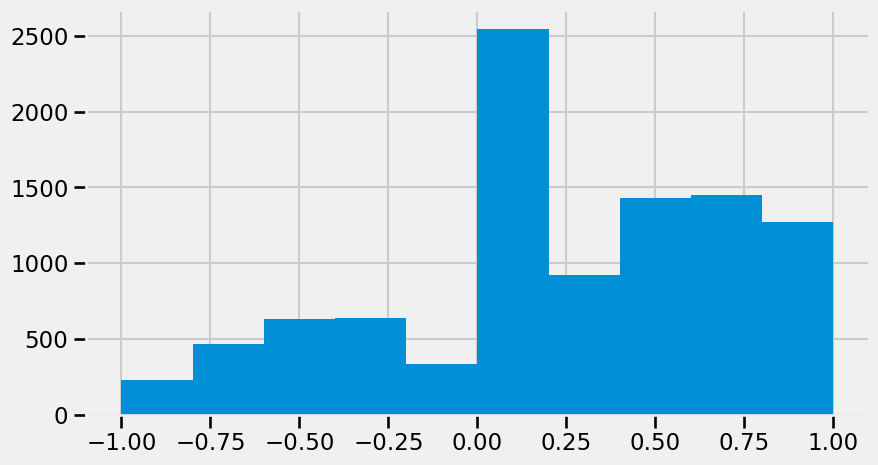

In [33]:
print(tweets['vader sentiment'].mean())
plt.hist(pd.Series(tweets['vader sentiment']), bins=10, range=(-1,1))

#### Favourable results for further research.
This result is rather favourable. Only about 20% of the data has a sentiment score of 0, suggesting a neutral sentiment. As this percentage is not too high, it suggests that the model is capable of detecting sentiments from the used Twitter data.

Furthermore, we can observe the histogram is skewed towards positive sentiment, with an overall average sentiment of 0.210, suggesting that the public are more likely to be in favour of open streets than not.

## Flair
What sets Flair apart is its focus on contextualized word embeddings, a critical component in understanding the nuances of language. (It classifies noun, verbs and adjectives, to perceive meaning more accurately). This is achieved through the use of bidirectional LSTM (Long Short-Term Memory) models, enabling Flair to capture intricate relationships between words.

In [36]:
#from segtok.segmenter import split_single
#def make_sentences(text):
    """ Break apart text into a list of sentences """
    sentences = [sent for sent in split_single(text)]
    return sentences

IndentationError: unexpected indent (1806285635.py, line 3)

In [37]:
# Load a pre-trained sentiment analysis model
#classifier = TextClassifier.load('en-sentiment')


# Create function for sentiment using flair
def predict(sentence):
    """ Predict the sentiment of a sentence """
    if sentence == "":
        return 0
    text = Sentence(sentence)
    # stacked_embeddings.embed(text)
    classifier.predict(text)
    value = text.labels[0].to_dict()['value'] 
    if value == 'POSITIVE':
        result = text.to_dict()['labels'][0]['confidence']
    else:
        result = -(text.to_dict()['labels'][0]['confidence'])
    return round(result, 3)

def get_scores(sentences):
    """ Call predict on every sentence of a text """
    results = []
    
    for i in range(0, len(sentences)): 
        results.append(predict(sentences[i]))
    return results

def get_sum(scores):
    
    result = round(sum(scores)/len(scores), 3)
    return result

In [38]:
#This method uses breaking into sentences, which does not help.
#tweets['sentences'] = tweets['text'].apply(make_sentences)
#tweets['flair_sentence_score'] = tweets['sentences'].apply(get_scores)
#tweets['flair sentiment'] = tweets['flair_sentence_score'].apply(get_sum)
#tweets.head()

In [39]:
# Use this function instead

classifier = TextClassifier.load('en-sentiment')

# Create function for sentiment using flair
def flair_sentiment(x):
    sentence = Sentence(x)
    classifier.predict(sentence)
    score = sentence.labels[0].score
    value = sentence.labels[0].value
    if value == 'NEGATIVE':
        return -round(score,3)
    else:
        return round(score,3)

In [40]:
flair_sentiment('I really like streets')

0.997

In [41]:
tweets['flair sentiment'] = tweets['text'].apply(flair_sentiment)
tweets.head(1)

username  \
timestamp                                
2019-03-05 13:03:00+00:00  @Penalosa_G   

                                                                        text  \
timestamp                                                                      
2019-03-05 13:03:00+00:00  it's happening, in many cities as san jose, la...   

                           quotes  replies  retweets  likes  \
timestamp                                                     
2019-03-05 13:03:00+00:00       0        0         2      6   

                                                fullname        date  \
timestamp                                                              
2019-03-05 13:03:00+00:00  Gil Penalosa #Cities4Everyone  2019-03-05   

                           vader sentiment  flair sentiment  
timestamp                                                    
2019-03-05 13:03:00+00:00           0.7703            0.626

## TextBlob

In [42]:
def textblob_sentiment(x):
    s = TextBlob(x)
    return s.sentiment.polarity

def textblob_subjectivity(x):
    s = TextBlob(x)
    return s.sentiment.subjectivity

print(textblob_sentiment('I hate this shit'))
print(textblob_subjectivity('I hate this shit'))

-0.5
0.8500000000000001


In [43]:
tweets['textblob sentiment'] = tweets['text'].apply(lambda x: textblob_sentiment(x))
tweets['textblob subjectivity'] = tweets['text'].apply(lambda x: textblob_subjectivity(x))
tweets.head(1)

username  \
timestamp                                
2019-03-05 13:03:00+00:00  @Penalosa_G   

                                                                        text  \
timestamp                                                                      
2019-03-05 13:03:00+00:00  it's happening, in many cities as san jose, la...   

                           quotes  replies  retweets  likes  \
timestamp                                                     
2019-03-05 13:03:00+00:00       0        0         2      6   

                                                fullname        date  \
timestamp                                                              
2019-03-05 13:03:00+00:00  Gil Penalosa #Cities4Everyone  2019-03-05   

                           vader sentiment  flair sentiment  \
timestamp                                                     
2019-03-05 13:03:00+00:00           0.7703            0.626   

                           textblob sentiment  textblob subjectivity  
timestamp                                                             
2019-03-05 13:03:00+00:00               0.175               0.356667

In [44]:
# Saving tweets df
#tweets.to_csv('openstreet_wsentiment.csv', sep=',', index=True, encoding ='utf-8')

In [45]:
len(tweets[tweets['vader sentiment']<0])

2298

In [46]:
d = {'Sentiment Analyser':['Positive','Neutral', 'Negative'],
     'Vader': [len(tweets[tweets['vader sentiment']>0])/9912, 
               len(tweets[tweets['vader sentiment']==0])/9912,
               len(tweets[tweets['vader sentiment']<0])/9912],
     'Textblob': [len(tweets[tweets['textblob sentiment']>0])/9912, 
                  len(tweets[tweets['textblob sentiment']==0])/9912,
                  len(tweets[tweets['textblob sentiment']<0])/9912],
     'Flair': [len(tweets[tweets['flair sentiment']>0])/9912,
               np.nan,
               len(tweets[tweets['flair sentiment']<0])/9912]
    }
                
sentiment_summary = pd.DataFrame(data=d)
sentiment_summary

Sentiment Analyser     Vader  Textblob    Flair
0           Positive  0.554177  0.616122  0.54207
1            Neutral  0.213983  0.222155      NaN
2           Negative  0.231840  0.161723  0.45793

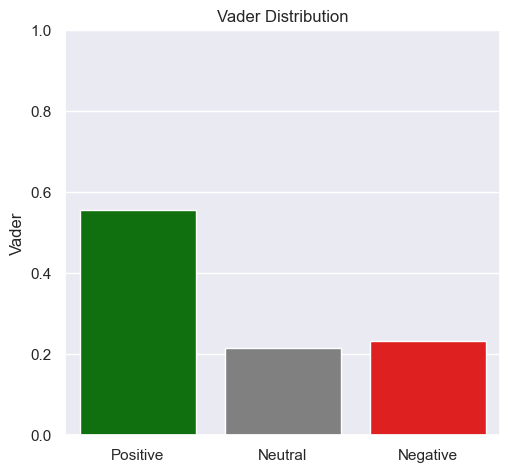

In [49]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data=sentiment_summary, x='Sentiment Analyser', y='Vader', palette= ['green','grey','red'])
plt.title('Vader Distribution')
plt.xlabel('')
plt.ylim((0,1))
plt.savefig('vader_distribution.png')

## Summary of sentiments for all three tools

## Applying all 3 libraries for the sample taken:

In [50]:
sample_tweets.head()

Unnamed: 0                  timestamp          username  \
0           0  2020-08-10 12:44:00+00:00   @Winchester9Law   
1           1  2022-05-05 00:14:00+00:00  @berrystalliance   
2           2  2021-11-08 20:17:00+00:00          @gecko39   
3           3  2020-07-14 10:42:00+00:00          @evie4us   
4           4  2021-07-13 00:38:00+00:00        @NBk_QOLCC   

                                                text        date  Matt  Tiger  \
0  Op-Ed | New York City’s Open Streets plan fail...  10/08/2020  -1.0   -1.0   
1  Same on  Berry wrong sign for wrong program  y...  05/05/2022  -1.0   -1.0   
2  NYC's Streetfighter on NYC's Best Open Street:...  08/11/2021   0.5    0.0   
3  Still waiting for our 31st Ave  in  to be appr...  14/07/2020   1.0   -1.0   
4  Isn't the founder of Beta NYC & North Brooklyn...  13/07/2021   0.0   -1.0   

   Stella  Sarah  Harry  human average  
0    -0.5   -1.0   -1.0           -0.9  
1    -1.0   -1.0   -1.0           -1.0  
2     0.0    0.5    0.5            0.3  
3    -0.5    1.0    1.0            0.3  
4    -0.5    0.0   -0.5           -0.4

In [51]:
# VADER
sample_tweets['vader sentiment'] = sample_tweets['text'].apply(lambda x: vader_sentiment(x))

# Flair
sample_tweets['flair sentiment'] = sample_tweets['text'].apply(lambda x: flair_sentiment(x))

# Textblob
sample_tweets['textblob sentiment'] = sample_tweets['text'].apply(lambda x: textblob_sentiment(x))
sample_tweets['textblob subjectivity'] = sample_tweets['text'].apply(lambda x: textblob_subjectivity(x))

In [52]:
def sentiment_checker(x,y):
    if x>0 and y>0:
        return 1
    elif x<0 and y<0:
        return 1
    elif x<0.5 and x>-0.5 and y==0:
        return 1
    else: return 0

In [53]:
sample_tweets.columns

Index(['Unnamed: 0', 'timestamp', 'username', 'text', 'date', 'Matt', 'Tiger',
       'Stella', 'Sarah', 'Harry', 'human average', 'vader sentiment',
       'flair sentiment', 'textblob sentiment', 'textblob subjectivity'],
      dtype='object')

In [54]:
sample_tweets['vader test'] = sample_tweets.apply(lambda x: sentiment_checker(x['human average'], x['vader sentiment']), axis=1)
sample_tweets['flair test'] = sample_tweets.apply(lambda x: sentiment_checker(x['human average'], x['flair sentiment']), axis=1)
sample_tweets['textblob test'] = sample_tweets.apply(lambda x: sentiment_checker(x['human average'], x['textblob sentiment']), axis=1)

In [55]:
# Load previously saved file with sentiments
sample_tweets = pd.read_csv('openstreet_sample_wsentiment.csv').iloc[:,2:]
sample_tweets.head()

timestamp          username  \
0  2020-08-10 12:44:00+00:00   @Winchester9Law   
1  2022-05-05 00:14:00+00:00  @berrystalliance   
2  2021-11-08 20:17:00+00:00          @gecko39   
3  2020-07-14 10:42:00+00:00          @evie4us   
4  2021-07-13 00:38:00+00:00        @NBk_QOLCC   

                                                text        date  Matt  Tiger  \
0  Op-Ed | New York City’s Open Streets plan fail...  10/08/2020  -1.0   -1.0   
1  Same on  Berry wrong sign for wrong program  y...  05/05/2022  -1.0   -1.0   
2  NYC's Streetfighter on NYC's Best Open Street:...  08/11/2021   0.5    0.0   
3  Still waiting for our 31st Ave  in  to be appr...  14/07/2020   1.0   -1.0   
4  Isn't the founder of Beta NYC & North Brooklyn...  13/07/2021   0.0   -1.0   

   Stella  Sarah  Harry  human average  vader sentiment  flair sentiment  \
0    -0.5    NaN    NaN      -0.833333          -0.4215        -0.998906   
1    -1.0    NaN    NaN      -1.000000          -0.8720        -0.999974   
2     0.0    NaN    NaN       0.166667           0.6696         0.993455   
3    -0.5    NaN    NaN      -0.166667           0.3612        -0.909152   
4    -0.5    NaN    NaN      -0.500000          -0.0572        -0.992373   

   textblob sentiment  textblob subjectivity  machine average  test  \
0           -0.143939               0.396591        -0.521448     1   
1           -0.285281               0.632143        -0.719085     1   
2            0.375000               0.575000         0.679352     1   
3            0.200000               0.500000        -0.115984     1   
4            0.000000               0.250000        -0.349858     1   

   vader test  flair test  textblob test  
0           1           1              1  
1           1           1              1  
2           1           1              1  
3           0           1              0  
4           1           1              0

In [56]:
sample_tweets[sample_tweets['human average']<0.2]['vader test'].mean()

0.578125

In [57]:
d = {'tool':['vader', 'flair','textblob'],
     'accuracy': [sample_tweets['vader test'].mean(), 
                  sample_tweets['flair test'].mean(),
                  sample_tweets['textblob test'].mean()]}
accuracy = pd.DataFrame(data=d)
accuracy

tool  accuracy
0     vader      0.67
1     flair      0.54
2  textblob      0.57

Each time the machine runs, the accuracy used by the tools are slightly different. Usually for VADER, the accuracy fluctuates around 70%. In the study, the accuracy obtained was 71%.

In [58]:
#dfi.export(accuracy, 'accuracy_df.png')

Text(0.5, 1.0, 'Accuracy of Various Sentiment Analysers (based on human raters)')

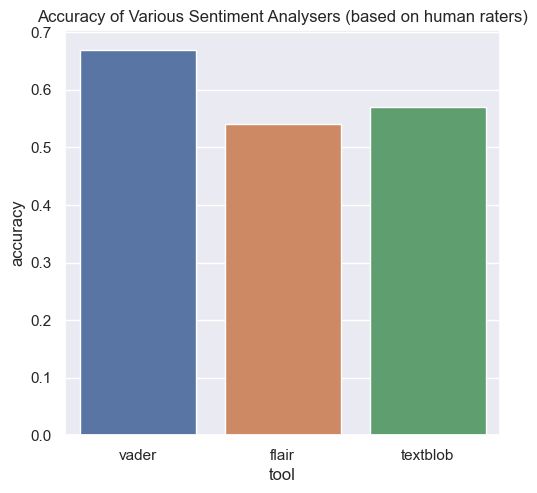

In [59]:
#
sns.barplot(data=accuracy, x='tool', y='accuracy',
           errorbar='sd')
plt.title('Accuracy of Various Sentiment Analysers (based on human raters)')


The accuracy shows that Vader sentiment has the highest 72% accuracy rate. Flair and Textblob sentiments have only 57% accuracy rate. Taking the average of all 3 machine learning languages did not make it better, with only an accuracy rate of 58%. Hence, for the rest of the study, we will analyse using only vader sentiment.

How many percent wrong is due to not having enough vocabulary inside? Can include more vocab related to urban planning/living, to have a better sense of the sentiment.

In [60]:
print('correctly classified subjectivity ' + str(sample_tweets[sample_tweets['test']==1]['textblob subjectivity'].mean()))
print('wrongly classified subjectivity ' + str(sample_tweets[sample_tweets['test']==0]['textblob subjectivity'].mean()))

correctly classified subjectivity 0.4441155287207919
wrongly classified subjectivity 0.414470493976308


Only 5 instance of wrongly categorising neutral sentiments using vader. Much less than other libraries.

In [61]:
sample_tweets[(sample_tweets['test'] == 0)]

timestamp          username  \
5   2020-09-27 15:30:00+00:00        @NYPD24Pct   
8   2020-12-15 16:55:00+00:00      @freeparknyc   
9   2022-01-29 17:09:00+00:00  @berrystalliance   
12  2021-08-09 08:46:00+00:00  @clickcashprofit   
13  2021-09-13 04:17:00+00:00  @PiperJosephine1   
17  2022-05-18 22:05:00+00:00        @kduggan16   
20  2020-07-31 22:52:00+00:00       @BKHtsPatch   
22  2020-04-15 19:18:00+00:00     @M_Friedrichs   
24  2022-10-06 18:45:00+00:00  @cindymclaughlin   
25  2020-08-26 13:55:00+00:00      @freeparknyc   
26  2020-10-04 14:43:00+00:00  @UpperWestSide_b   
28  2021-04-18 23:28:00+00:00         @Choresh2   
32  2020-11-17 17:02:00+00:00   @ourbikelanenyc   
34  2020-09-28 16:25:00+00:00          @k_fiery   
36  2020-08-15 00:40:00+00:00   @enforcelawsNYC   
37  2021-07-02 16:23:00+00:00        @OpenPlans   
38  2020-11-10 19:21:00+00:00         @WEPS_nyc   
43  2021-10-12 11:57:00+00:00  @MakeQueensSafer   
46  2020-08-27 23:14:00+00:00          @berkie1   
47  2020-04-20 14:27:00+00:00  @CarolineSpivack   
49  2021-02-01 20:01:00+00:00   @MagicMaineHerb   
52  2020-05-22 03:24:00+00:00       @JoanGralla   
54  2020-06-06 22:08:00+00:00         @TooJeng3   
56  2022-10-26 00:04:00+00:00      @NYDailyNews   
57  2020-10-26 12:36:00+00:00         @jooltman   
59  2020-04-17 11:48:00+00:00           @aishku   
60  2021-03-30 18:01:00+00:00      @freeparknyc   
62  2021-08-08 21:25:00+00:00    @johntomlinson   
65  2020-04-14 13:09:00+00:00         @TransAlt   
72  2020-07-02 21:24:00+00:00       @queenspost   
73  2021-07-12 03:57:00+00:00      @MikeyTVNews   
75  2020-05-12 21:59:00+00:00      @emiliainnyc   
76  2021-05-23 15:58:00+00:00         @Choresh2   
77  2022-06-29 22:08:00+00:00   @NYCDOTProjects   
80  2021-06-06 09:58:00+00:00  @StephanieHorse3   
86  2022-02-12 01:26:00+00:00        @justniece   
87  2020-11-12 21:44:00+00:00      @WaluigiSoap   
90  2022-02-28 17:11:00+00:00  @RaviSebastianus   
92  2021-01-15 18:07:00+00:00   @my_block_party   
93  2022-12-30 23:57:00+00:00         @infopobn   
95  2020-03-22 18:41:00+00:00       @itsmjdavis   
97  2021-09-29 22:01:00+00:00  @berrystalliance   
99  2020-05-11 14:11:00+00:00      @sanaznosrat   

                                                 text        date  Matt  \
5   📢 Please be advised that Amsterdam Avenue will...  27/09/2020   0.0   
8   RT NYC_DOT "Due to expected severe weather, fr...  15/12/2020   0.0   
9   Go to the NYC parks its much safer than having...  29/01/2022  -1.0   
12  The Pandemic Gave New York City ‘Open Streets....  09/08/2021   0.0   
13  Only  can stop this insanity.  The other guy i...  13/09/2021  -0.5   
17  Brooklyn pol wants DOT ‘reassessment’ of Fort ...  18/05/2022   0.0   
20  NYC Adds Outdoor Dining To 15 More Open Street...  31/07/2020   0.0   
22  One other argument for open streets: in my cir...  15/04/2020   0.5   
24  Please don't.  We should be expanding  not con...  06/10/2022   1.0   
25  RT NYC_DOT "_alastair Open Streets on Parkside...  26/08/2020   0.0   
26  One More Block Added to Local 'Open Street' Re...  04/10/2020   0.0   
28  Good evening . This vehicle has been parked on...  18/04/2021   0.0   
32   Why are you taking  away just as the beginnin...  17/11/2020   1.0   
34  NYC makes outdoor dining, open streets permane...  28/09/2020   0.0   
36           They are open streets. Open to cars😂😂😂😂😂  15/08/2020  -0.5   
37  Have you seen our proposal for an Office of Pu...  02/07/2021   0.0   
38  Transportation Comm  zoom meeting tonight: Tue...  10/11/2020   0.0   
43                                         34thAve     12/10/2021   0.0   
46  Oakland has over 100 miles. New York have over...  27/08/2020   0.5   
47  Need some help envisioning how NYC can open st...  20/04/2020   0.0   
49  Watch out,  Soon this is coming to us. A green...  01/02/2021  -0.5   
52  New York City rolls out next wave of open stre...  22/05/2020   0.0   
54     did y'all just give up on Crescent st? wher

In [62]:
# Saving tweets df
#sample_tweets.to_csv('openstreet_sample_wsentiment.csv', sep=',', index=True, encoding ='utf-8')

# 
# Analysis

In [63]:
tweets = pd.read_csv('openstreet_wsentiment.csv', sep=',', index_col=0, encoding ='utf-8')
print(tweets.shape)
tweets.dtypes
# Drop columns
cols = ['quotes', 'replies', 'retweets', 'likes', 'fullname']
tweets.drop(columns = cols, inplace = True)

(9912, 12)


In [64]:
# change datetime
tweets['date'] = pd.to_datetime(tweets['date'])
tweets['year'] = tweets['date'].dt.year
tweets['month'] = tweets['date'].dt.month
tweets['day'] = tweets['date'].dt.day_name()

business_days = pd.bdate_range('2019-01-01', '2022-12-31')
tweets['bdate'] = tweets['date'].isin(business_days)

tweets.head(1)

username  \
timestamp                                
2019-03-05 13:03:00+00:00  @Penalosa_G   

                                                                        text  \
timestamp                                                                      
2019-03-05 13:03:00+00:00  it's happening, in many cities as san jose, la...   

                                date  vader sentiment  flair sentiment  \
timestamp                                                                
2019-03-05 13:03:00+00:00 2019-03-05           0.7703            0.626   

                           textblob sentiment  textblob subjectivity  year  \
timestamp                                                                    
2019-03-05 13:03:00+00:00               0.175               0.356667  2019   

                           month      day  bdate  
timestamp                                         
2019-03-05 13:03:00+00:00      3  Tuesday   True

In [65]:
tweets

username  \
timestamp                                     
2019-03-05 13:03:00+00:00       @Penalosa_G   
2019-03-26 01:29:00+00:00            @diceo   
2019-04-02 00:41:00+00:00    @happifydesign   
2019-04-03 14:47:00+00:00     @NellePierson   
2019-04-05 14:24:00+00:00           @Curbed   
...                                     ...   
2022-12-30 18:21:00+00:00     @amyyeewrites   
2022-12-30 20:33:00+00:00         @infopobn   
2022-12-30 21:44:00+00:00          @NYC_SBS   
2022-12-30 21:55:00+00:00  @berrystalliance   
2022-12-30 23:57:00+00:00         @infopobn   

                                                                        text  \
timestamp                                                                      
2019-03-05 13:03:00+00:00  it's happening, in many cities as san jose, la...   
2019-03-26 01:29:00+00:00  this is how much space in total that all of ny...   
2019-04-02 00:41:00+00:00  hey,  let's do better than nyc and make our  m...   
2019-04-03 14:47:00+00:00  the city needs to actually pay for open street...   
2019-04-05 14:24:00+00:00  new york city should use its open-streets even...   
...                                                                      ...   
2022-12-30 18:21:00+00:00  our  story: the pandemic transformed streets t...   
2022-12-30 20:33:00+00:00  perhaps the nyc govt politicians and lackey en...   
2022-12-30 21:44:00+00:00  we're proud to be a part of  full-force effort...   
2022-12-30 21:55:00+00:00  she wouldn’t last a day in nyc. “im half a mil...   
2022-12-30 23:57:00+00:00  when lobbyists count for more than the nyc pub...   

                                date  vader sentiment  flair sentiment  \
timestamp                                                                
2019-03-05 13:03:00+00:00 2019-03-05           0.7703            0.626   
2019-03-26 01:29:00+00:00 2019-03-26           0.6249           -1.000   
2019-04-02 00:41:00+00:00 2019-04-02           0.8074            0.999   
2019-04-03 14:47:00+00:00 2019-04-03          -0.1280           -0.998   
2019-04-05 14:24:00+00:00 2019-04-05           0.6369           -0.943   
...                              ...              ...              ...   
2022-12-30 18:21:00+00:00 2022-12-30           0.8120            0.992   
2022-12-30 20:33:00+00:00 2022-12-30          -0.3400           -0.991   
2022-12-30 21:44:00+00:00 2022-12-30           0.9060            0.996   
2022-12-30 21:55:00+00:00 2022-12-30          -0.8898           -1.000   
2022-12-30 23:57:00+00:00 2022-12-30           0.0000            0.998   

                           textblob sentiment  textblob subjectivity  year  \
timestamp                                                                    
2019-03-05 13:03:00+00:00            0.175000               0.356667  2019   
2019-03-26 01:29:00+00:00            0.100000               0.454167  2019   
2019-04-02 00:41:00+00:00            0.300000               0.633333  2019   
2019-04-03 14:47:00+00:00            0.050000               0.325000  2019   
2019-04-05 14:24:00+00:00            0.168182               0.477273  2019   
...                                       ...                    ...   ...   
2022-12-30 18:21:00+00:00            0.333333               0.500000  2022   
2022-12-30 20:33:00+00:00            0.000000               0.500000  2022   
2022-12-30 21:44:00+00:00            0.481250               0.625000  2022   
2022-12-30 21:55:00+00:00           -0.083333               0.116667  2022   
2022-12-30 23:57:00+00:00            0.100000               0.300000  2022   

                           month        day  bdate  
timestamp                                           
2019-03-05 13:03:00+00:00      3    Tuesday   True  
2019-03-26 01:29:00+00:00      3    Tuesday   True  
2019-04-02 00:41:00+00:00      4    Tuesday   True  
2019-04-03 14:47:00+00:00      4  Wednesday   True  
2019-04-05 14:24:00+00:00      4     Friday   True  
...                          ... 

In [66]:
datecount = tweets[['text','date']].groupby('date').agg('count')

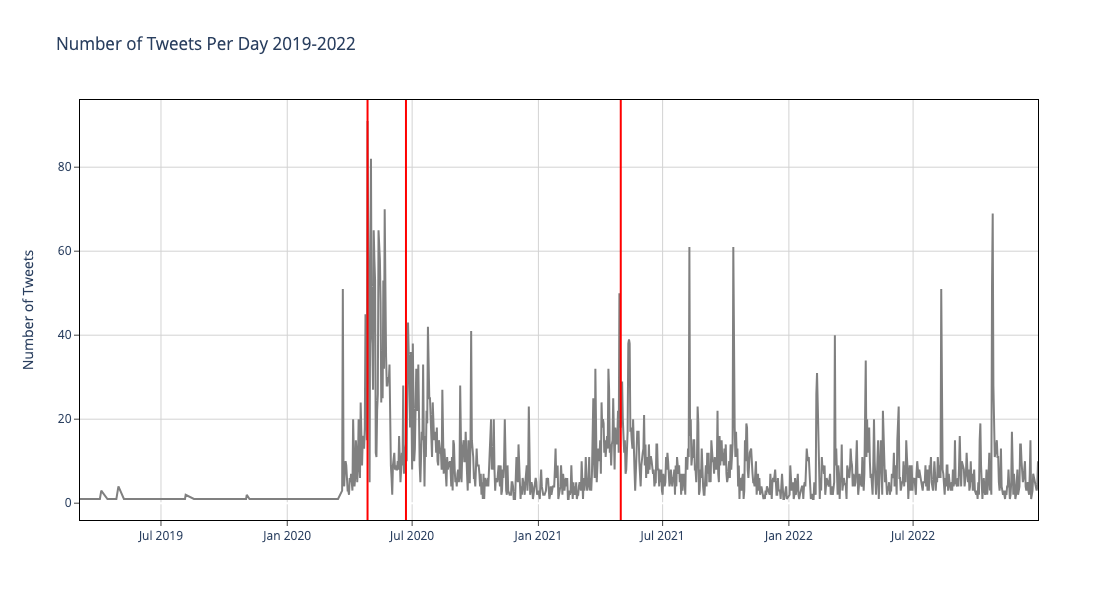

In [67]:

#rolling sentiments of 100
fig = go.Figure()
fig.add_trace(go.Scatter(x=datecount.index, y=datecount['text'], line=dict(color='grey', width=2)))
fig.update_layout(title='Number of Tweets Per Day 2019-2022',
                  xaxis_title='',
                  yaxis_title='Number of Tweets',
                  plot_bgcolor='white',
                 width=1100,
                 height=600)
fig.add_vline(x=pd.to_datetime('2020-04-27'), line_color="red")
fig.add_vline(x=pd.to_datetime('2020-06-22'), line_color="red")
fig.add_vline(x=pd.to_datetime('2021-05-01'), line_color="red")
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.show()

/Users/matticii/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/matticii/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



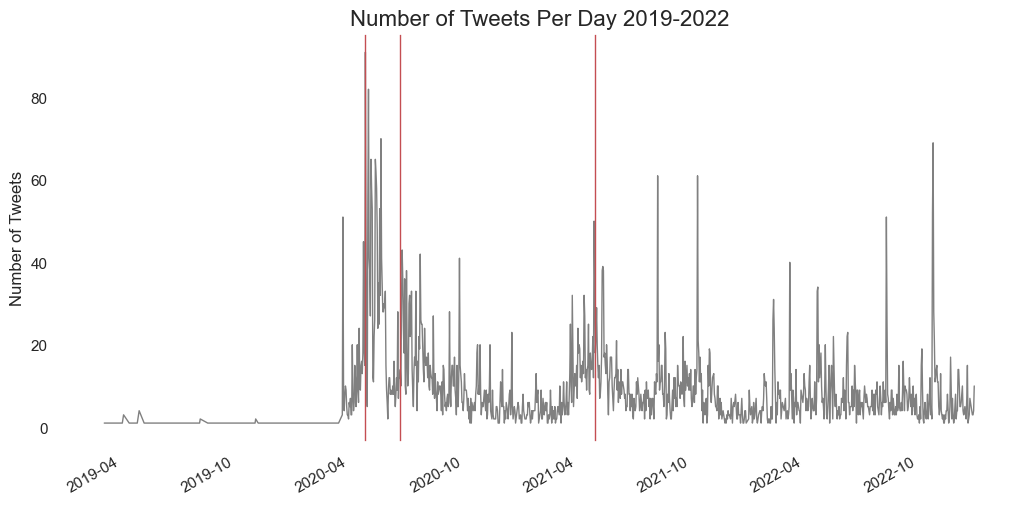

In [68]:
# Timeframe when the tweets appeared the most in 2021

datecount = tweets.groupby('date').size().dropna()
datecount = pd.DataFrame(datecount, columns=['Count'])

fig, ax = plt.subplots(figsize=(11,6), facecolor='white')

half_year_locator = mdates.MonthLocator(interval=6)
year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only
fig.autofmt_xdate()
ax.set_facecolor("white")

sns.lineplot(data=datecount, lw=1,legend=None, palette = 'grey')
plt.title('Number of Tweets Per Day 2019-2022', fontsize=16)
plt.axvline(x = pd.to_datetime('2020-04-27'), color = 'r', lw=1)
plt.axvline(x = pd.to_datetime('2020-06-22'), color = 'r', lw=1)
plt.axvline(x = pd.to_datetime('2021-05-01'), color = 'r', lw=1)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xlabel('')
plt.savefig('distribution.jpeg', bbox_inches='tight', facecolor='white')

/Users/matticii/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



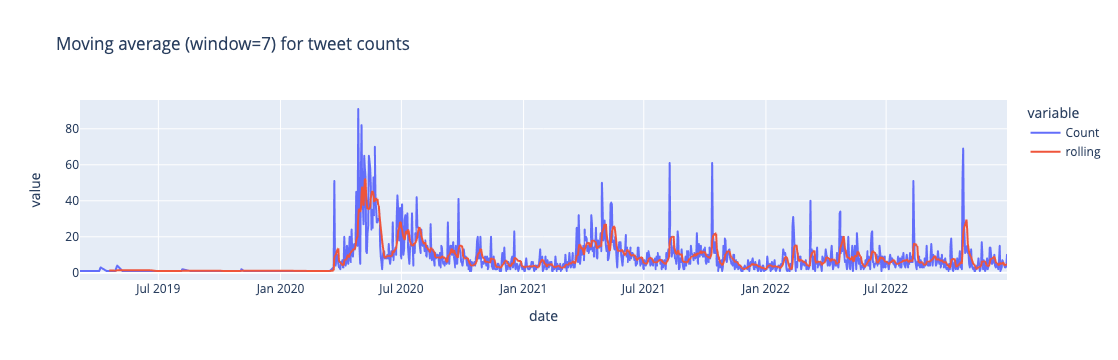

In [69]:
# datecount for rolling
datecount['rolling'] = datecount['Count'].rolling(window=7, min_periods=7).mean()

# Plotting
px.line(datecount, title = 'Moving average (window=7) for tweet counts')

/var/folders/l4/dt5s4bl514j41hts3r55lh6m0000gn/T/ipykernel_53254/1198478756.py:11: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



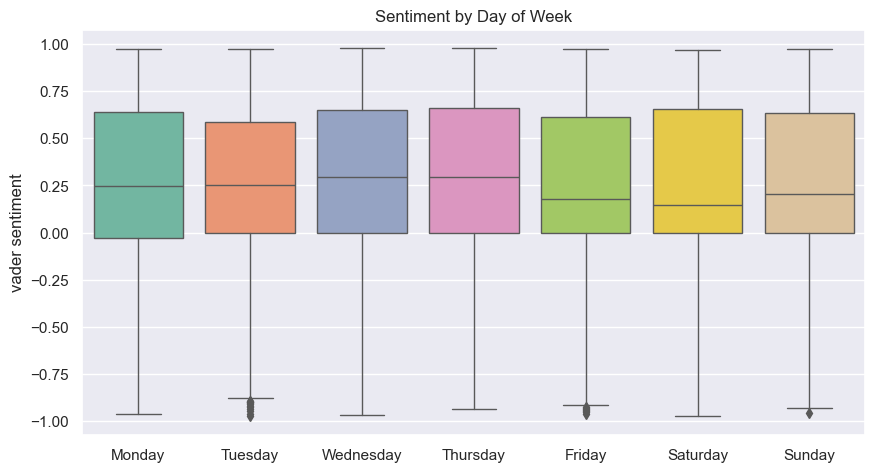

In [70]:
# Average sentiment on different days

fig, ax = plt.subplots(figsize=(9,5))
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.boxplot(data=tweets,
           x = 'day',
           y = 'vader sentiment',
           order = days, linewidth=1, palette="Set2")
plt.title('Sentiment by Day of Week')
plt.xlabel('')
fig.show()

/Users/matticii/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/matticii/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



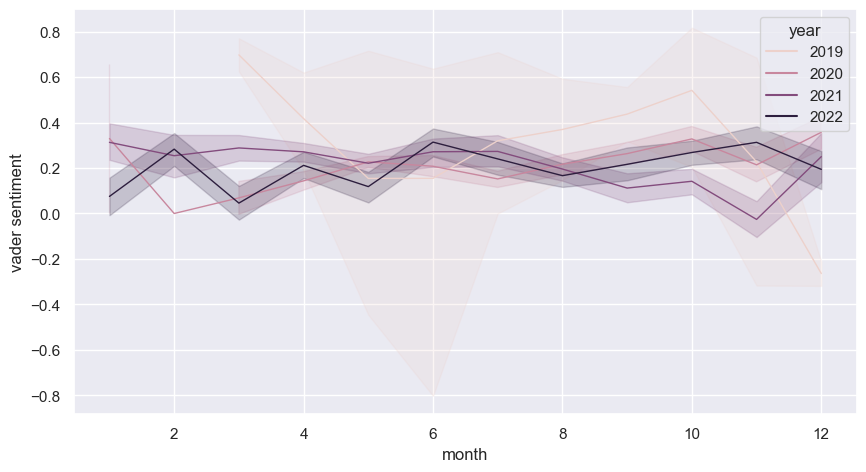

In [71]:
# Understanding the distribution of sentiments
#data=tweets[tweets[year] == 2020]

fig, ax = plt.subplots(figsize=(9,5))
sns.lineplot(x="month", y="vader sentiment",hue="year",data=tweets,
            lw=1)
plt.show()

In [72]:
tweets.columns


Index(['username', 'text', 'date', 'vader sentiment', 'flair sentiment',
       'textblob sentiment', 'textblob subjectivity', 'year', 'month', 'day',
       'bdate'],
      dtype='object')

In [73]:
##fig = px.line(x= tweets['date'],
#        y= tweets['MA sentiment'], 
#        title = 'Moving average (window=100) for vader sentiments',
#             line=dict(color="#ffe476")).add_vline(x='2020-04')
#fig.update_layout(
#    plot_bgcolor='white')
#
#fig.show()

/Users/matticii/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



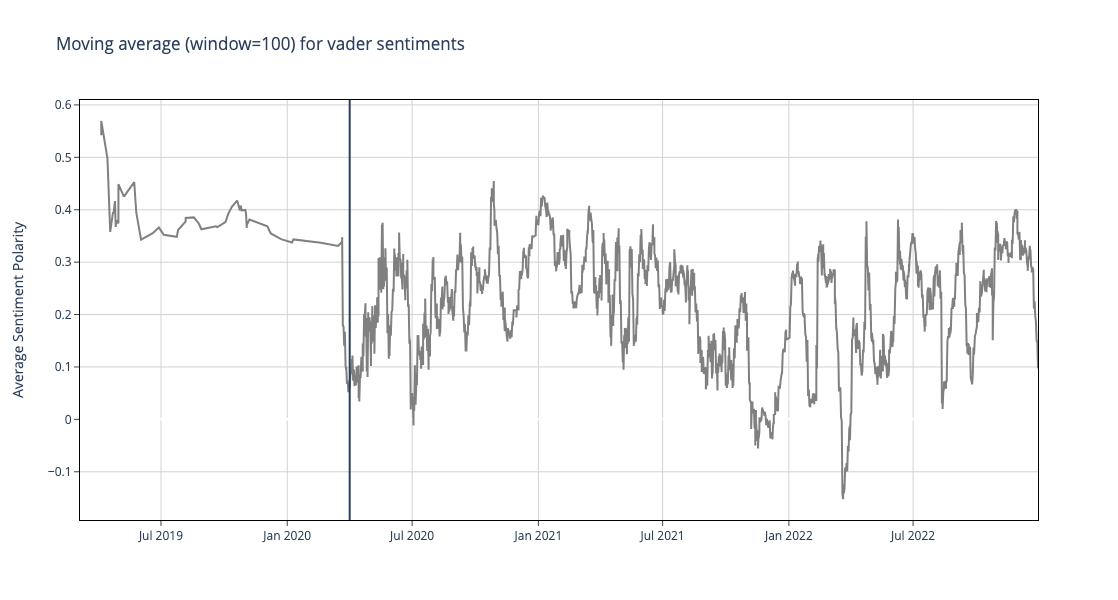

In [74]:
import plotly.graph_objects as go
#rolling sentiments of 100
tweets.sort_values('date', ascending=True)
tweets['MA sentiment'] = tweets['vader sentiment'].rolling(window=100, min_periods=5).mean()

fig = go.Figure()
fig.add_trace(go.Scatter(x= tweets['date'], y= tweets['MA sentiment'], line=dict(color='grey', width=2)))
fig.update_layout(title='Moving average (window=100) for vader sentiments',
                  xaxis_title='',
                  yaxis_title='Average Sentiment Polarity',
                  plot_bgcolor='white',
                 width=1100,
                 height=600)
fig.add_vline(x=pd.to_datetime('2020-04'))
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.show()

In [75]:
tweets.head()

username  \
timestamp                                   
2019-03-05 13:03:00+00:00     @Penalosa_G   
2019-03-26 01:29:00+00:00          @diceo   
2019-04-02 00:41:00+00:00  @happifydesign   
2019-04-03 14:47:00+00:00   @NellePierson   
2019-04-05 14:24:00+00:00         @Curbed   

                                                                        text  \
timestamp                                                                      
2019-03-05 13:03:00+00:00  it's happening, in many cities as san jose, la...   
2019-03-26 01:29:00+00:00  this is how much space in total that all of ny...   
2019-04-02 00:41:00+00:00  hey,  let's do better than nyc and make our  m...   
2019-04-03 14:47:00+00:00  the city needs to actually pay for open street...   
2019-04-05 14:24:00+00:00  new york city should use its open-streets even...   

                                date  vader sentiment  flair sentiment  \
timestamp                                                                
2019-03-05 13:03:00+00:00 2019-03-05           0.7703            0.626   
2019-03-26 01:29:00+00:00 2019-03-26           0.6249           -1.000   
2019-04-02 00:41:00+00:00 2019-04-02           0.8074            0.999   
2019-04-03 14:47:00+00:00 2019-04-03          -0.1280           -0.998   
2019-04-05 14:24:00+00:00 2019-04-05           0.6369           -0.943   

                           textblob sentiment  textblob subjectivity  year  \
timestamp                                                                    
2019-03-05 13:03:00+00:00            0.175000               0.356667  2019   
2019-03-26 01:29:00+00:00            0.100000               0.454167  2019   
2019-04-02 00:41:00+00:00            0.300000               0.633333  2019   
2019-04-03 14:47:00+00:00            0.050000               0.325000  2019   
2019-04-05 14:24:00+00:00            0.168182               0.477273  2019   

                           month        day  bdate  MA sentiment  
timestamp                                                         
2019-03-05 13:03:00+00:00      3    Tuesday   True           NaN  
2019-03-26 01:29:00+00:00      3    Tuesday   True           NaN  
2019-04-02 00:41:00+00:00      4    Tuesday   True           NaN  
2019-04-03 14:47:00+00:00      4  Wednesday   True           NaN  
2019-04-05 14:24:00+00:00      4     Friday   True        0.5423

In [76]:
len(tweets[tweets['flair sentiment']<0])

4539

In [77]:
# Mean sentiment score from 2020.01.01 onwards
tweets['MA sentiment'].loc['2020-01-01':].dropna().mean()

0.2129807444269146

In [78]:
# Mean sentiment score in 2022
tweets[tweets['year']==2022]['vader sentiment'].mean()

0.20751727728499808

In [79]:
# Testing stationarity
#Ho: It is non stationary
#H1: It is stationary
from statsmodels.tsa.stattools import adfuller

def adfuller_test(trends):
    result=adfuller(trends)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [80]:
adfuller_test(tweets['MA sentiment'].dropna())

ADF Test Statistic : -6.693889078807098
p-value : 4.045060364932073e-09
#Lags Used : 33
Number of Observations Used : 9874
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


/var/folders/l4/dt5s4bl514j41hts3r55lh6m0000gn/T/ipykernel_53254/790891748.py:14: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



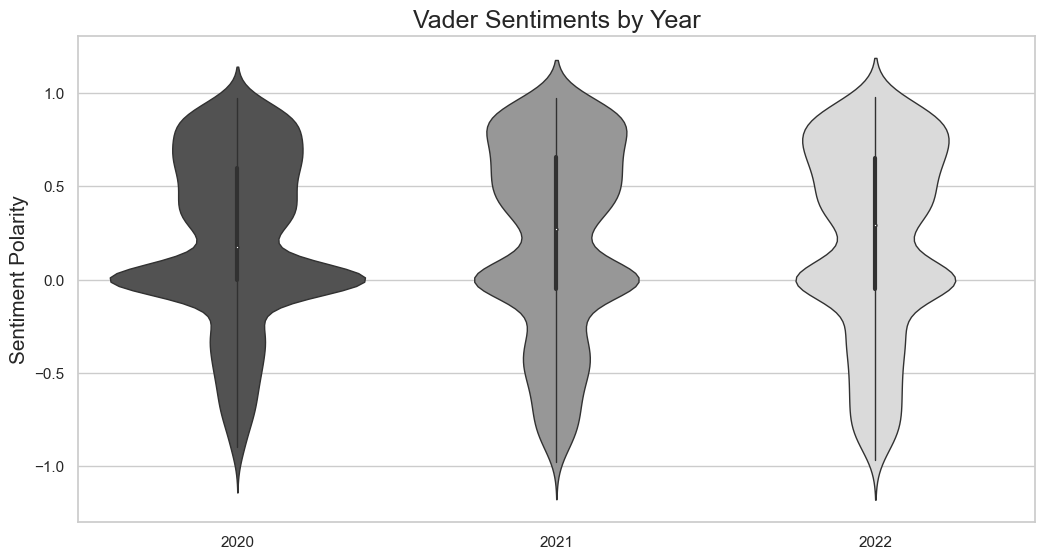

In [82]:
# Violinplot (a combination of the boxplot and kernel density plot)
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(11,6), facecolor='white')
sns.violinplot(data=tweets[tweets['year']!=2019],
               x = 'year',
               y = 'vader sentiment',
               linewidth=1, palette="Greys_r", facecolor='white')
plt.title('Vader Sentiments by Year', fontsize=18)
ax.set_facecolor("white")
fig.patch.set_facecolor('white')
plt.xlabel('')
plt.ylabel('Sentiment Polarity', fontsize=15)
fig.show()
fig.savefig('Sentiment Difference.jpeg')

In [84]:
# Investigate whether they are from the same distribution using anova

tweets_frame = tweets[tweets['year']!=2019].rename(columns={'vader sentiment':'vader_sent'})

model = ols('year ~ vader_sent', data=tweets_frame).fit()
anova_result = sm.stats.anova_lm(model,typ=2)
anova_result

sum_sq      df         F    PR(>F)
vader_sent     0.051560     1.0  0.079137  0.778476
Residual    6422.713146  9858.0       NaN       NaN

In [85]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_result = pairwise_tukeyhsd(tweets_frame['vader_sent'], tweets_frame['year'])
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  2020   2021   0.0025 0.9734 -0.0243 0.0293  False
  2020   2022  -0.0041 0.9402 -0.0326 0.0245  False
  2021   2022  -0.0066 0.8631 -0.0365 0.0233  False
---------------------------------------------------


In [ ]:
#dfi.export(anova_result, 'anova_result.png')

The simple anova test shows that the p-value =0.78, which is very large (higher than the critical value of p=0.05). Hence, there is strong evidence to suggest that the 3 samples (of 3 different years) belong to the same dustribution.

In [86]:
# Further test using t-test
tweets2020 = tweets[tweets['year']==2020]['vader sentiment']
tweets2021 = tweets[tweets['year']==2021]['vader sentiment']
tweets2022 = tweets[tweets['year']==2022]['vader sentiment']

print(len(tweets2020), len(tweets2021),len(tweets2022))

compare2021 = stats.ttest_ind(tweets2020,tweets2021)
compare2022 = stats.ttest_ind(tweets2020,tweets2022)
print(compare2021)
print(compare2022)

4043 3224 2593
TtestResult(statistic=-0.22520257619043077, pvalue=0.8218280194803699, df=7265.0)
TtestResult(statistic=0.34267014118471417, pvalue=0.7318574845684747, df=6634.0)


/var/folders/l4/dt5s4bl514j41hts3r55lh6m0000gn/T/ipykernel_53254/398684715.py:5: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



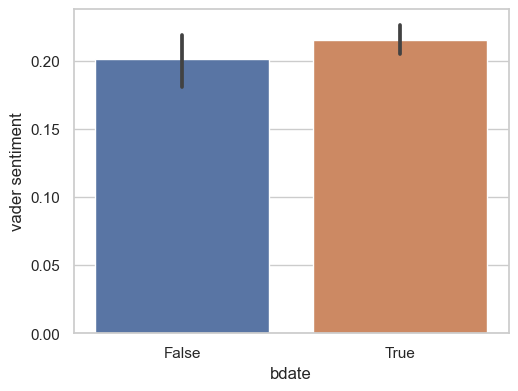

In [87]:
fig, ax = plt.subplots(figsize=(5,4))
sns.barplot(data=tweets,
           x = 'bdate',
           y = 'vader sentiment')
fig.show()

## Word Cloud
Word cloud is generated to visualise the hot topics per half a year to understand the changing trends.

In [88]:
# Derived nonimportant words to be removed (stopwords)
nimpt_words = {'Open Street', 'Streets program', 'ly', 'openstreets', 'New York',''
              'program','City', 'NYC', 'NYCMayor','Open', 'Street', 'Streets', 'will', 'w', 'gov','New', 'York',
              's', 'u', 'bit', 'Yorkers', 'mayor', 'way', 'rt', 'nyc_dot'}

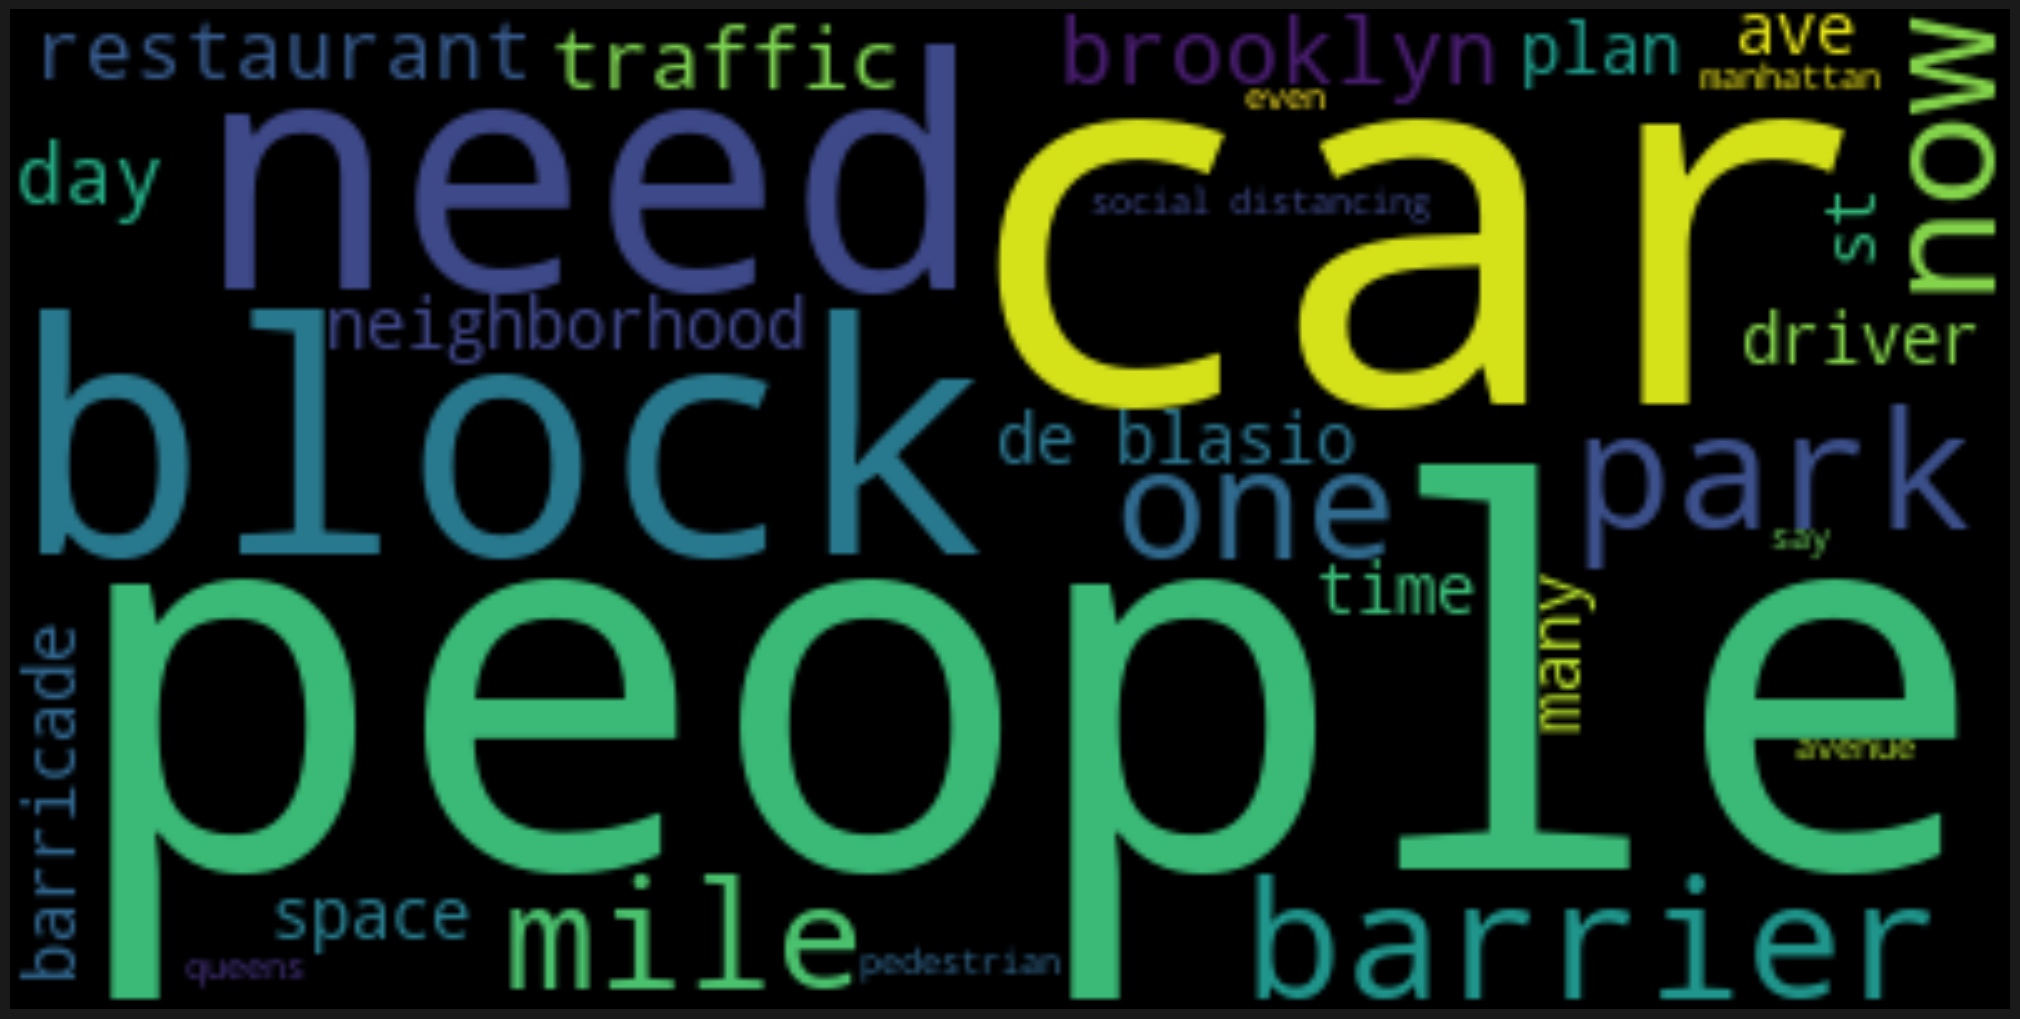

In [89]:
stopwords = set(STOPWORDS|nimpt_words)

positive = tweets[tweets['vader sentiment']>0]
negative = tweets[tweets['vader sentiment']<0]
#wordcloud
wordcloud = WordCloud(stopwords = stopwords, max_words=30).generate(''.join(negative[negative['year']==2020]['text']))

plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout (pad=0)

plt.show()


In [90]:
#wordcloud.to_file('negative2020.png')

## Understanding impacts of username

In [91]:
tweets['username'].value_counts().iloc[10:20]

username
@noneck             76
@MakeQueensSafer    72
@infopobn           65
@KathyParkPrice     57
@nbkopenstreets     56
@NBk_QOLCC          53
@parkslope5thave    52
@pekochel           50
@Mrele11            49
@jooltman           46
Name: count, dtype: int64

In [92]:
# Lets first look at what each of these famous are talking about. Let's start with @berrystalliance.
# @berrystalliance unifies local block associations & residents from Williamsburg and Greenpoint Brooklyn.
# The average sentiment for berry st alliance is -0.244, signifying that is tends towards negative sentiments

tweets_user = tweets[tweets['username']== '@berrystalliance']
print('The average sentiment for @berrystalliance is ' + str(sum(tweets_user['vader sentiment']/len(tweets_user))))
#tweets_user


The average sentiment for @berrystalliance is -0.24555578747628082


In [93]:
# @freeparknyc usually gives a more positive opinion about open streets
tweets_user = tweets[tweets['username']== '@freeparknyc']
print('The average sentiment for @freeparknyc is ' + str(sum(tweets_user['vader sentiment']/len(tweets_user))))


The average sentiment for @freeparknyc is 0.292372297297297


In [94]:
# @34_ave usually gives a more positive opinion about open streets. 
# This is likely because they are publicising for new events, and therefore using more positive words. 
tweets_user = tweets[tweets['username']== '@34_ave']
print('The average sentiment for @34_ave is ' + str(sum(tweets_user['vader sentiment']/len(tweets_user))))
#tweets_user

The average sentiment for @34_ave is 0.6055303797468355


In [95]:
# @nbkopenstreets usually give a positive opinion about open streets. 
# @nbkopenstreets Community coalition supporting NBk's safe #OpenStreets for all. 
# It is interesting when compared to @berrystalliance, which are from the same area (Williamsburg and Greenpoint Brooklyn).
# Why is there a difference between the sentiments?

tweets_user = tweets[tweets['username']== '@nbkopenstreets']
print('The average sentiment for @nbkopenstreets is ' + str(sum(tweets_user['vader sentiment']/len(tweets_user))))
#tweets_user


The average sentiment for @nbkopenstreets is 0.3965857142857143


We notice that there are a lot of publicity measures done by different departments that may skew the dataset. Hence, we may consider removing them?

In [96]:
tweets[10:20]

username  \
timestamp                                     
2019-04-23 16:15:00+00:00        @NCBlogNet   
2019-04-25 14:13:00+00:00    @CenterForArch   
2019-04-26 20:09:00+00:00   @ArtichokeDance   
2019-04-27 17:23:00+00:00         @jooltman   
2019-04-30 11:17:00+00:00  @greengorebridge   
2019-04-30 11:55:00+00:00   @MeanderApparel   
2019-04-30 16:26:00+00:00       @EPScotland   
2019-04-30 19:37:00+00:00   @designtrustnyc   
2019-05-08 02:35:00+00:00     @linda_lee098   
2019-05-14 17:51:00+00:00       @CHRankings   

                                                                        text  \
timestamp                                                                      
2019-04-23 16:15:00+00:00  art & soul, crawfish parties, cocktail tasting...   
2019-04-25 14:13:00+00:00  30 blocks + 0 cars = open streets  join us alo...   
2019-04-26 20:09:00+00:00  👇🏽celebrate earth day🌎🌍🌏30 blocks + 0 cars = o...   
2019-04-27 17:23:00+00:00  if  put as much energy into making sure  and p...   
2019-04-30 11:17:00+00:00  edinburgh will be the first city in the uk to ...   
2019-04-30 11:55:00+00:00  "edinburgh will be the first city in the uk to...   
2019-04-30 16:26:00+00:00  edinburgh will be the first city in the uk to ...   
2019-04-30 19:37:00+00:00  this saturday, design trust for public space &...   
2019-05-08 02:35:00+00:00  where is the law? the citizens of nyc have a r...   
2019-05-14 17:51:00+00:00  a7: open streets policies — like the bronx, ny...   

                                date  vader sentiment  flair sentiment  \
timestamp                                                                
2019-04-23 16:15:00+00:00 2019-04-23           0.4019            1.000   
2019-04-25 14:13:00+00:00 2019-04-25           0.6588            1.000   
2019-04-26 20:09:00+00:00 2019-04-26          -0.2263            0.997   
2019-04-27 17:23:00+00:00 2019-04-27           0.5423           -0.974   
2019-04-30 11:17:00+00:00 2019-04-30           0.2960            0.852   
2019-04-30 11:55:00+00:00 2019-04-30           0.8957            0.975   
2019-04-30 16:26:00+00:00 2019-04-30           0.6597            0.993   
2019-04-30 19:37:00+00:00 2019-04-30           0.9080            0.979   
2019-05-08 02:35:00+00:00 2019-05-08           0.0000           -0.992   
2019-05-14 17:51:00+00:00 2019-05-14           0.6597            0.978   

                           textblob sentiment  textblob subjectivity  year  \
timestamp                                                                    
2019-04-23 16:15:00+00:00            0.250000               0.500000  2019   
2019-04-25 14:13:00+00:00            0.000000               0.230556  2019   
2019-04-26 20:09:00+00:00            0.000000               0.500000  2019   
2019-04-27 17:23:00+00:00            0.100000               0.457778  2019   
2019-04-30 11:17:00+00:00            0.128788               0.429293  2019   
2019-04-30 11:55:00+00:00            0.365909               0.560967  2019   
2019-04-30 16:26:00+00:00            0.226894               0.414646  2019   
2019-04-30 19:37:00+00:00            0.200000               0.338889  2019   
2019-05-08 02:35:00+00:00            0.142857               0.517857  2019   
2019-05-14 17:51:00+00:00            0.250000               0.375000  2019   

                           month        day  bdate  MA sentiment  
timestamp                                                         
2019-04-23 16:15:00+00:00      4    Tuesday   True      0.394600  
2019-04-25 14:13:00+00:00      4   Thursday   True      0.416617  
2019-04-26 20:09:00+00:00      4     Friday   True      0.367162  
2019-04-27 17:23:00+00:00      4   Saturday  False      0.379671  
2019-04-30 11:17:00+00:00      4    Tuesday   True      0.374093  
2019-04-30 11:55:00+00:00      4    Tuesday   True      0.406694  
2019-04-30 16:26:00+00:00      4    Tuesday   True      0.421576  
2019-04-30 19:37:00+00:00      4    Tuesday   True      0.448600  
2019-05-08 02